In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import chardet
# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lightgbm
from sklearn.linear_model import LinearRegression

import eli5
from eli5.sklearn import PermutationImportance

In [2]:
train_path = '/data/ephemeral/home/lyh_0119_train.csv' 
test_path  = '/data/ephemeral/home/lyh0119_test.csv'

dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)
# Train data와 Test data shape은 아래와 같습니다.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)
# Train과 Test data를 살펴보겠습니다.
display(dt.head(1))
display(dt_test.head(1))      # 부동산 실거래가(=Target) column이 제외된 모습입니다.


Train data shape :  (1118785, 39) Test data shape :  (9272, 39)


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리
0,계단식,개별난방,79.97,8,3,1987,127.05721,37.476763,개포6차우성,201712,...,561052,41374,1.5,0.425268,13,45,53,84,0,6805.712976


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리
0,계단식,개별난방,79.97,26,5,1987,127.05721,37.476763,개포6차우성,202307,...,534103,51919,3.5,0.425268,13,45,53,84,0,6805.712976


In [3]:
print(dt.columns)
print(dt_test.columns)

Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '구', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500',
       'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area',
       '대장아파트_거리'],
      dtype='object')
Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '구', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500',
       'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area',
       '대장아파트_거리'],
      dtype='object')


In [4]:
print(dt.isnull().sum())


복도유형                          0
난방방식                          0
전용면적                          0
계약일                           0
층                             0
건축년도                          0
x                             0
y                             0
아파트명                       2126
계약년월                          0
도로명                           0
도로명주소                         0
mean_지상층수                 80496
sum_세대수                   80496
sum_연면적                   80496
mean_연면적                  80496
mean_높이                   80496
sum_건축면적                  80496
mean_건축면적                 80496
부속건축물수                    80496
target                        0
구                             0
동                             0
시군구                           0
bus_min_dist                  0
sub_min_dist                  0
한강거리                          0
소비자전세물가지수                     0
소비자월세물가지수                     0
총인구수                          0
연GDP                          0
기준금리    

In [5]:
print(dt_test.isnull().sum())

복도유형                         0
난방방식                         0
전용면적                         0
계약일                          0
층                            0
건축년도                         0
x                            0
y                            0
아파트명                        10
계약년월                         0
도로명                          0
도로명주소                        0
mean_지상층수                  379
sum_세대수                    379
sum_연면적                    379
mean_연면적                   379
mean_높이                    379
sum_건축면적                   379
mean_건축면적                  379
부속건축물수                     379
target                    9272
구                            0
동                            0
시군구                          0
bus_min_dist                 0
sub_min_dist                 0
한강거리                         0
소비자전세물가지수                    0
소비자월세물가지수                    0
총인구수                         0
연GDP                         0
기준금리                         0
dist_to_

In [6]:
dt[dt.아파트명.isnull()] # 기타로 처리 예정

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,총인구수,연GDP,기준금리,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리
50864,계단식,지역난방,76.10,16,5,2005,127.032434,37.498326,NaN,201710,...,561052,41374,1.25,0.574181,21,85,94,151,1,6805.474846
50865,혼합식,지역난방,62.19,26,6,2005,127.032434,37.498326,NaN,201802,...,547453,43664,1.50,0.574181,21,85,94,151,1,6805.474846
50866,혼합식,지역난방,58.65,9,6,2005,127.032434,37.498326,NaN,201806,...,547453,43664,1.50,0.574181,21,85,94,151,1,6805.474846
50867,계단식,지역난방,110.51,19,3,2005,127.032434,37.498326,NaN,201803,...,547453,43664,1.50,0.574181,21,85,94,151,1,6805.474846
50871,계단식,지역난방,84.42,2,4,2005,127.032434,37.498326,NaN,201111,...,573003,32407,3.25,0.574181,21,85,94,151,1,6805.474846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081655,복도식,개별난방,41.74,1,6,2003,127.022228,37.568887,NaN,201701,...,134593,41374,1.25,0.438295,24,82,115,251,0,6800.321836
1081656,계단식,개별난방,82.00,1,2,2003,127.022228,37.568887,NaN,201704,...,134593,41374,1.25,0.438295,24,82,115,251,0,6800.321836
1081657,복도식,개별난방,29.35,21,7,2015,127.022228,37.568887,NaN,201611,...,134409,39356,1.25,0.438295,24,82,115,251,0,6800.321836
1081658,계단식,개별난방,82.00,13,4,2003,127.022228,37.568887,NaN,201411,...,136227,35113,2.00,0.438295,24,82,115,251,0,6800.321836


In [7]:
dt.loc[dt.아파트명.isnull(), '아파트명'] = '기타'
dt_test.loc[dt_test.아파트명.isnull(), '아파트명'] = '기타'


In [8]:
dt['mean_지상층수'] # 널 값들 다시 계산 
# 결측치가 있는 mean_지상층수 컬럼의 값을 같은 'x,y 좌표'를 가진 행들 중 '층' 컬럼의 평균값으로 대체 예정 

0          5.0
1          5.0
2          5.0
3          5.0
4          5.0
          ... 
1118780    NaN
1118781    NaN
1118782    NaN
1118783    NaN
1118784    NaN
Name: mean_지상층수, Length: 1118785, dtype: float64

In [9]:
# '층' 컬럼의 평균을 계산하는 함수를 정의합니다.
def calculate_floor_mean(group):
    return group['층'].mean()

# 'x,y 좌표' 기준으로 그룹화하고 '층' 컬럼의 평균을 계산합
floor_mean_by_coord = dt.groupby(['x', 'y']).apply(calculate_floor_mean).reset_index(name='mean_floor')

# 원본 데이터프레임에 계산된 평균을 병합 'mean_floor' 컬럼이 추가
dt = dt.merge(floor_mean_by_coord, on=['x', 'y'], how='left')
dt_test = dt_test.merge(floor_mean_by_coord, on=['x', 'y'], how='left')

# 'mean_지상층수' 컬럼의 결측치를 'mean_floor'의 값으로 대체
dt['mean_지상층수'] = np.where(dt['mean_지상층수'].isnull(), dt['mean_floor'], dt['mean_지상층수'])
dt_test['mean_지상층수'] = np.where(dt_test['mean_지상층수'].isnull(), dt_test['mean_floor'], dt_test['mean_지상층수'])


# 이제 'mean_floor' 컬럼은 필요 없으므로 삭제합니다.
dt = dt.drop(columns=['mean_floor'])
dt_test = dt_test.drop(columns=['mean_floor'])

print(dt.mean_지상층수.isnull().sum())
print(dt_test.mean_지상층수.isnull().sum()) # 이래도 117개 있다고 ? 

# dt_test에서 mean_지상층수의 결측치를 해당 층의 값으로 대체
dt_test['mean_지상층수'] = np.where(dt_test['mean_지상층수'].isnull(), dt_test['층'], dt_test['mean_지상층수'])

print(dt.mean_지상층수.isnull().sum())
print(dt_test.mean_지상층수.isnull().sum()) 

0
117
0
0


In [10]:
# # 나머지 결측치 걍 다 삭제 
# columns_to_drop = ['sum_세대수', 'sum_연면적', 'mean_연면적', 'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수']
# dt = dt.drop(columns=columns_to_drop)
# dt_test = dt_test.drop(columns=columns_to_drop)

In [11]:
# # 일단 k-전체동수,k-연면적 ,건축면적, 아파트명 삭제하고 주차대수 + 세대당 주차대수 추가해보자 


# # 'k-전체동수', 'k-연면적', '건축면적', '아파트명' 컬럼 삭제
# columns_to_drop = ['k-전체동수','k-연면적', '건축면적', '아파트명']
# dt.drop(columns=columns_to_drop, inplace=True)
# dt_test.drop(columns=columns_to_drop, inplace=True)

# # 컬럼 삭제 후 DataFrame 확인
# print(dt.info())
# print(dt_test.info())

In [12]:
# 전용면적 이상치 처리 

print("전용면적 이상치 처리 전 train_data :",dt.shape)
print("전용면적 이상치 처리 전 test_data :",dt_test.shape)


전용면적 이상치 처리 전 train_data : (1118785, 39)
전용면적 이상치 처리 전 test_data : (9272, 39)


## 주차장 관련 피처 추가해보자

In [13]:
pk_train = pd.read_csv('/data/ephemeral/home/train.csv')
pk_test = pd.read_csv('/data/ephemeral/home/test.csv')

pk_train = pk_train['주차대수']
pk_test = pk_test['주차대수']

print(pk_train.info())
print('==================================')
print(pk_test.info())


<class 'pandas.core.series.Series'>
RangeIndex: 1118822 entries, 0 to 1118821
Series name: 주차대수
Non-Null Count   Dtype  
--------------   -----  
249108 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 9272 entries, 0 to 9271
Series name: 주차대수
Non-Null Count  Dtype  
--------------  -----  
2709 non-null   float64
dtypes: float64(1)
memory usage: 72.6 KB
None


In [14]:
print(pk_train.head(10)) 
print(pk_test.head(10))

0    262.0
1    262.0
2    262.0
3    262.0
4    262.0
5    262.0
6    262.0
7    262.0
8    262.0
9    262.0
Name: 주차대수, dtype: float64
0     262.0
1     305.0
2     419.0
3     419.0
4     419.0
5     652.0
6    1100.0
7    1100.0
8    1100.0
9    3153.0
Name: 주차대수, dtype: float64


In [15]:
# 그냥 인덱스 기준으로 합쳐 

dt['주차대수'] = pk_train
dt_test['주차대수']= pk_test

display(dt)
display(dt_test)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,연GDP,기준금리,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리,주차대수
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,13,45,53,84,0,6805.712976,262.0
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,13,45,53,84,0,6805.712976,262.0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,41374,1.5,0.425268,13,45,53,84,0,6805.712976,262.0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,43664,1.5,0.425268,13,45,53,84,0,6805.712976,262.0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,43664,1.5,0.425268,13,45,53,84,0,6805.712976,262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118780,혼합식,개별난방,68.12,27,5,1996,127.102872,37.608820,"엘지,쌍용",200804,...,27894,5.0,0.212669,25,60,53,43,1,6798.494934,195.0
1118781,계단식,개별난방,84.67,11,5,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,25,60,53,43,1,6798.494934,195.0
1118782,계단식,개별난방,84.67,17,9,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,25,60,53,43,1,6798.494934,195.0
1118783,혼합식,개별난방,68.12,20,8,1996,127.102872,37.608820,"엘지,쌍용",200805,...,27894,5.0,0.212669,25,60,53,43,1,6798.494934,420.0


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,연GDP,기준금리,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리,주차대수
0,계단식,개별난방,79.97,26,5,1987,127.057210,37.476763,개포6차우성,202307,...,51919,3.5,0.425268,13,45,53,84,0,6805.712976,262.0
1,혼합식,지역난방,161.00,28,15,1984,127.055990,37.483894,개포우성3차,202307,...,51919,3.5,0.251399,19,58,76,97,1,6805.211221,305.0
2,혼합식,지역난방,133.46,10,14,1984,127.055990,37.483894,개포우성3차,202308,...,51919,3.5,0.251399,19,58,76,97,1,6805.211221,419.0
3,혼합식,지역난방,104.43,18,6,1984,127.055990,37.483894,개포우성3차,202308,...,51919,3.5,0.251399,19,58,76,97,1,6805.211221,419.0
4,복도식,지역난방,74.25,28,8,1983,127.068028,37.487802,개포주공5단지,202307,...,51919,3.5,0.235353,22,37,69,67,1,6804.165397,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,51919,3.5,0.342844,16,44,80,120,1,6798.440788,1568.0
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,51919,3.5,0.342844,16,44,80,120,1,6798.440788,1568.0
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,51919,3.5,0.342844,16,44,80,120,1,6798.440788,1568.0
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,51919,3.5,0.342844,16,44,80,120,1,6798.440788,1568.0


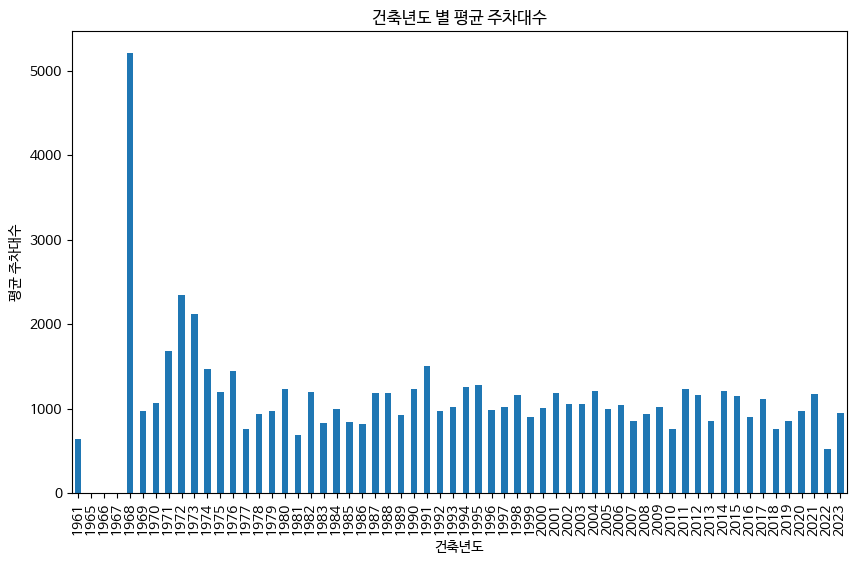

In [16]:
# '건축년도' 별로 '주차대수'의 평균을 계산
parking_by_year = dt.groupby('건축년도')['주차대수'].mean()

plt.figure(figsize=(10, 6))
parking_by_year.plot(kind='bar')
plt.title('건축년도 별 평균 주차대수')
plt.xlabel('건축년도')
plt.ylabel('평균 주차대수')
plt.show()
# 그냥 이래버리면 의미가 없음. 세대 수를 고려한 건축년도 별 평균 주차대수를 구해야하는데 세대 수가 아직 결측치가 안채워져있으니... 
# 그냥 선형보간으로 채우고 , 세대수도 선형보간으로 채우고, 년도별 세대 수 당 평균 주차대수 컬럼 3개 추가해서 돌려보고 rmse:100362.0131보다 얼마나 작아지는지 변화 추이 확인 ㄱㄱ 	

In [17]:
org_train = pd.read_csv('/data/ephemeral/home/train.csv')
org_test = pd.read_csv('/data/ephemeral/home/test.csv')

print(org_train.columns)
print(org_test.columns)

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')
Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과

### 

In [18]:
org_train= org_train['k-전체세대수']
org_test = org_test['k-전체세대수']

dt['k-전체세대수'] = org_train
dt_test['k-전체세대수']= org_test


## concat 

In [19]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # 하나의 데이터로 만들어줍니다.
print("전용면적 이상치 처리 전 concat_data :",concat.shape)

전용면적 이상치 처리 전 concat_data : (1128057, 42)


In [20]:
# 먼저, 연속형 변수와 범주형 변수를 위 info에 따라 분리해주겠습니다.
continuous_columns = []
categorical_columns = []

for column in concat.columns:
    if pd.api.types.is_numeric_dtype(concat[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['전용면적', '계약일', '층', '건축년도', 'x', 'y', '계약년월', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적', 'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', 'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수', '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500', 'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area', '대장아파트_거리', '주차대수', 'k-전체세대수', 'is_test']
범주형 변수: ['복도유형', '난방방식', '아파트명', '도로명', '도로명주소', '구', '동', '시군구']


In [21]:
concat.isnull().sum()

복도유형                           0
난방방식                           0
전용면적                           0
계약일                            0
층                              0
건축년도                           0
x                              0
y                              0
아파트명                           0
계약년월                           0
도로명                            0
도로명주소                          0
mean_지상층수                      0
sum_세대수                    80875
sum_연면적                    80875
mean_연면적                   80875
mean_높이                    80875
sum_건축면적                   80875
mean_건축면적                  80875
부속건축물수                     80875
target                      9272
구                              0
동                              0
시군구                            0
bus_min_dist                   0
sub_min_dist                   0
한강거리                           0
소비자전세물가지수                      0
소비자월세물가지수                      0
총인구수                           0
연GDP      

In [22]:
# 범주형 변수에 대한 보간
concat[categorical_columns] = concat[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
concat[continuous_columns] = concat[continuous_columns].interpolate(method='linear', axis=0)

In [23]:
# ljh = pd.read_csv('/data/ephemeral/home/merge_train_final.csv')
# ljh.columns

In [24]:
# ljh['sum_세대수'].isnull().sum()

In [25]:
concat.isnull().sum()         # 결측치가 보간된 모습을 확인해봅니다.

복도유형                      0
난방방식                      0
전용면적                      0
계약일                       0
층                         0
건축년도                      0
x                         0
y                         0
아파트명                      0
계약년월                      0
도로명                       0
도로명주소                     0
mean_지상층수                 0
sum_세대수                   0
sum_연면적                   0
mean_연면적                  0
mean_높이                   0
sum_건축면적                  0
mean_건축면적                 0
부속건축물수                    0
target                    0
구                         0
동                         0
시군구                       0
bus_min_dist              0
sub_min_dist              0
한강거리                      0
소비자전세물가지수                 0
소비자월세물가지수                 0
총인구수                      0
연GDP                      0
기준금리                      0
dist_to_nearest_school    0
bus_count_500             0
bus_count_1000            0
bus_count_1500      

In [26]:
display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,dist_to_nearest_school,bus_count_500,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리,주차대수,k-전체세대수,is_test
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,0.425268,13,45,53,84,0,6805.712976,262.0,270.0,0
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,0.425268,13,45,53,84,0,6805.712976,262.0,270.0,0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,0.425268,13,45,53,84,0,6805.712976,262.0,270.0,0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,0.425268,13,45,53,84,0,6805.712976,262.0,270.0,0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,0.425268,13,45,53,84,0,6805.712976,262.0,270.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,0.342844,16,44,80,120,1,6798.440788,1568.0,1402.0,1
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,0.342844,16,44,80,120,1,6798.440788,1568.0,1402.0,1
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,0.342844,16,44,80,120,1,6798.440788,1568.0,1402.0,1
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,0.342844,16,44,80,120,1,6798.440788,1568.0,1402.0,1


In [27]:
# 이제 선형보간 처리했으니 관련 컬럼 3개 추가해보자 

# 각 건물의 세대수당 주차대수 계산 -> 개별 건물의 세대수당 주차 공간 비율을 나타냄
concat['세대수당_주차대수'] = concat['주차대수'] / concat['k-전체세대수']

# 년도별 세대수당 주차대수 계산 -> 각 연도별 전체 평균 세대수당 주차 공간 비율을 나타냄
yearly_totals = concat.groupby('건축년도').agg({'주차대수': 'sum', 'k-전체세대수': 'sum'})
yearly_averages = yearly_totals['주차대수'] / yearly_totals['k-전체세대수']
concat['년도별_세대수당_평균_주차대수'] = concat['건축년도'].map(yearly_averages)

# 첫 번째 방법은 개별 건물의 특성을 반영하는 반면, 두 번째 방법은 연도별 전체적인 추세를 나타냄.
# 두 번째 방법은 시간에 따른 변화를 더 잘 파악하는 데 유용, 예를 들어, 시간이 지남에 따라 주차 공간 비율이 어떻게 변화하는지 분석 가능.

display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,bus_count_1000,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리,주차대수,k-전체세대수,is_test,세대수당_주차대수,년도별_세대수당_평균_주차대수
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,45,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,45,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,45,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,45,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,45,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,44,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,44,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,44,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,44,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397


In [28]:
concat.isnull().sum()  # ㅇㅋ 새로 추가한 컬럼도 결측치 없음 확인 

복도유형                      0
난방방식                      0
전용면적                      0
계약일                       0
층                         0
건축년도                      0
x                         0
y                         0
아파트명                      0
계약년월                      0
도로명                       0
도로명주소                     0
mean_지상층수                 0
sum_세대수                   0
sum_연면적                   0
mean_연면적                  0
mean_높이                   0
sum_건축면적                  0
mean_건축면적                 0
부속건축물수                    0
target                    0
구                         0
동                         0
시군구                       0
bus_min_dist              0
sub_min_dist              0
한강거리                      0
소비자전세물가지수                 0
소비자월세물가지수                 0
총인구수                      0
연GDP                      0
기준금리                      0
dist_to_nearest_school    0
bus_count_500             0
bus_count_1000            0
bus_count_1500      

## 파생변수 추가: 건축년도를 기반으로한 건물의 연령 : 현재 연도 - 건축연도  
- 의미가 있을까? 혹시모르니...(건축 기술 및 재료의 변화,건물의 상태와 유지보수,디자인 및 구조의 현대성,건축 규제의 변화)
- 따라서, "건축년도" 자체보다는 현재 연도와의 차이를 통해 계산된 "건물 연령"이 주택 가격에 미치는 영향을 보다 직접적으로 반영할 수 있으며, 이는 예측 모델의 정확도를 높일 수 있음. 

In [29]:
concat['건물나이'] = 2023 - concat['건축년도']
display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,bus_count_1500,bus_count_2000,is_station_area,대장아파트_거리,주차대수,k-전체세대수,is_test,세대수당_주차대수,년도별_세대수당_평균_주차대수,건물나이
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795,36
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795,36
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795,36
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795,36
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,53,84,0,6805.712976,262.0,270.0,0,0.970370,0.845795,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,80,120,1,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27


## 파생변수 추가: 빌딩간격 -> 단지 내에서 최고 높은 건물과 가장 낮은 건물 높이 차이 계산 
- 이를 위해서 최고층,최저층 컬럼도 추가해야함 (x,y)좌표 기준으로 같으면 같은 단지로 가정하고 생성


In [30]:
# 동일 아파트 단지 내에서 최고층과 최저층 계산
concat['최고층'] = concat.groupby(['x', 'y'])['층'].transform('max')
concat['최저층'] = concat.groupby(['x', 'y'])['층'].transform('min')

# 빌딩 간격 계산
concat['빌딩간격'] = concat['최고층'] - concat['최저층']

display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,대장아파트_거리,주차대수,k-전체세대수,is_test,세대수당_주차대수,년도별_세대수당_평균_주차대수,건물나이,최고층,최저층,빌딩간격
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,6805.712976,262.0,270.0,0,0.970370,0.845795,36,5,1,4
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,6805.712976,262.0,270.0,0,0.970370,0.845795,36,5,1,4
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,6805.712976,262.0,270.0,0,0.970370,0.845795,36,5,1,4
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,6805.712976,262.0,270.0,0,0.970370,0.845795,36,5,1,4
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,6805.712976,262.0,270.0,0,0.970370,0.845795,36,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27,12,3,9
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27,12,3,9
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27,12,3,9
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,6798.440788,1568.0,1402.0,1,1.118402,0.930397,27,12,3,9


## 파생변수 추가: 아파트당 타입 비율 계산: 특정 면적 타입의 세대 수를 총 세대 수로 나누어 아파트당 타입 비율을 계산
- (0, 30), (30, 60), (60, 90), (90, 120), (120~) 범위 5개로 나누어 추가 

In [31]:
area_ranges = [(0, 30), (30, 60), (60, 90), (90, 120), (120, float('inf'))] # 5개 추가 범위 별 
for i, (start, end) in enumerate(area_ranges, 1):
    column_name = f'type_ratio_{start}_{end}'
    concat[column_name] = concat['전용면적'].apply(lambda x: start <= x < end).astype(int)
    concat[column_name] = concat.groupby('k-전체세대수')[column_name].transform('sum') / concat['k-전체세대수']
display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,년도별_세대수당_평균_주차대수,건물나이,최고층,최저층,빌딩간격,type_ratio_0_30,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,0.845795,36,5,1,4,0.003704,0.133333,0.188889,0.066667,0.000000
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,0.845795,36,5,1,4,0.003704,0.133333,0.188889,0.066667,0.000000
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,0.845795,36,5,1,4,0.003704,0.133333,0.188889,0.066667,0.000000
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,0.845795,36,5,1,4,0.003704,0.133333,0.188889,0.066667,0.000000
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,0.845795,36,5,1,4,0.003704,0.133333,0.188889,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,0.930397,27,12,3,9,0.000000,0.199715,0.271041,0.031384,0.001427
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,0.930397,27,12,3,9,0.000000,0.199715,0.271041,0.031384,0.001427
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,0.930397,27,12,3,9,0.000000,0.199715,0.271041,0.031384,0.001427
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,0.930397,27,12,3,9,0.000000,0.199715,0.271041,0.031384,0.001427


In [32]:
filtered_data = concat[(concat['x'] == 127.05721) & (concat['전용면적'] > 120)]

# 결과 출력
if not filtered_data.empty:
    print("전용면적이 120을 넘는 데이터가 있습니다.")
    print(filtered_data)
else:
    print("전용면적이 120을 넘는 데이터가 없습니다.") # 없는데도 0.003704 이런 식으로 표시되긴 하는 구먼 

전용면적이 120을 넘는 데이터가 없습니다.


## 파생변수 추가: 최근 거래와의 차이 계산: 동일 아파트의 이전 거래 월과 현재 거래 월의 차이를 계산

In [33]:
concat['계약년월']

0       201712
1       201712
2       201712
3       201801
4       201801
         ...  
9267    202307
9268    202308
9269    202308
9270    202309
9271    202309
Name: 계약년월, Length: 1128057, dtype: int64

In [34]:
# 계약년월과 계약일을 결합하여 전체 거래 날짜를 생성
concat['거래날짜'] = pd.to_datetime(concat['계약년월'].astype(str) + concat['계약일'].astype(str), format='%Y%m%d')

# x, y 좌표를 기준으로 동일 아파트의 이전 거래와의 날짜 차이 계산
concat['이전거래날짜'] = concat.groupby(['x', 'y'])['거래날짜'].shift(1)
concat['거래날차이'] = (concat['거래날짜'] - concat['이전거래날짜']).dt.days

display(concat)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,최저층,빌딩간격,type_ratio_0_30,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf,거래날짜,이전거래날짜,거래날차이
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,2017-12-08,NaT,NaN
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,2017-12-22,2017-12-08,14.0
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,2017-12-28,2017-12-22,6.0
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,2018-01-03,2017-12-28,6.0
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,2018-01-08,2018-01-03,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,2023-07-22,2023-07-15,7.0
9268,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,2023-08-07,2023-07-22,16.0
9269,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,2023-08-17,2023-08-07,10.0
9270,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,2023-09-02,2023-08-17,16.0


In [35]:
print(concat['이전거래날짜'].info()) # 이거에 대한 널 값 처리 해야함 -> 데이터 기준 첫 째 거래는 이전 거래 날짜가 없음. 
print(concat['거래날차이'].info()) # 이거에 대한 널 값 처리 해야함 -> 데이터 기준 첫 째 거래는 거래 날 차이가 없음. 


<class 'pandas.core.series.Series'>
Int64Index: 1128057 entries, 0 to 9271
Series name: 이전거래날짜
Non-Null Count    Dtype         
--------------    -----         
1122171 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.2 MB
None
<class 'pandas.core.series.Series'>
Int64Index: 1128057 entries, 0 to 9271
Series name: 거래날차이
Non-Null Count    Dtype  
--------------    -----  
1122171 non-null  float64
dtypes: float64(1)
memory usage: 17.2 MB
None


In [36]:
# '이전거래날짜'가 null인 경우 '거래날짜'로 대체하고, '거래차이'가 null인 경우 0으로 대체
concat['이전거래날짜'] = concat['이전거래날짜'].fillna(concat['거래날짜'])
concat['거래날차이'] = concat['거래날차이'].fillna(0)

print(concat[['이전거래날짜', '거래날차이']])

         이전거래날짜  거래날차이
0    2017-12-08    0.0
1    2017-12-08   14.0
2    2017-12-22    6.0
3    2017-12-28    6.0
4    2018-01-03    5.0
...         ...    ...
9267 2023-07-15    7.0
9268 2023-07-22   16.0
9269 2023-08-07   10.0
9270 2023-08-17   16.0
9271 2023-09-02    9.0

[1128057 rows x 2 columns]


In [37]:
concat.drop(['거래날짜', '이전거래날짜'], axis=1, inplace=True)

## 파생변수 추가: 구별 급여총계 데이터 이용 (2016~2021) 2007~2015, 2022~2023은 linear regression으로 처리 

https://kosis.kr/statHtml/statHtml.do?tblId=DT_133001N_4215&orgId=133&language=kor&conn_path=&vw_cd=&list_id 데이터 링크 

In [38]:
money = pd.read_csv('/data/ephemeral/home/money.csv')
display(money)

,행정구역(시군구)별(1),행정구역(시군구)별(2),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,...,2020.6,2020.7,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,행정구역(시군구)별(1),행정구역(시군구)별(2),급여총계,급여총계,과세대상근로소득(총급여),과세대상근로소득(총급여),과세표준,과세표준,결정세액,결정세액,...,결정세액,결정세액,급여총계,급여총계,과세대상근로소득(총급여),과세대상근로소득(총급여),과세표준,과세표준,결정세액,결정세액
1,행정구역(시군구)별(1),행정구역(시군구)별(2),인원 (명),금액 (백만원),인원 (명),금액 (백만원),인원 (명),금액 (백만원),인원 (명),금액 (백만원),...,인원 (명),금액 (백만원),인원 (명),금액 (백만원),인원 (명),금액 (백만원),인원 (명),금액 (백만원),인원 (명),금액 (백만원)
2,전국,소계,17740098,600099695,17668285,595990661,15419516,320805519,9998156,30853854,...,12240163,44164060,19959148,807198885,19907727,803208612,17857818,455957519,12919174,52698621
3,서울,소계,3629625,138096837,3621150,137226200,3159795,79865568,2099483,10035736,...,2434090,14415848,3952583,184858796,3944244,184066506,3537573,113851288,2565528,17333494
4,서울,강남구,206668,13057288,206346,12989836,185324,9108357,139670,1761616,...,150113,2434790,215632,17477665,215441,17417230,197339,12781199,156295,2932330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,경남,합천군,9315,262452,9204,260814,8048,127450,4919,7764,...,5907,10602,9838,317420,9816,316507,8846,162244,6086,11417
245,제주,소계,197972,5705113,197102,5674147,169719,2826393,101628,226606,...,134640,333303,232571,7985643,232345,7951570,207655,4141826,142908,375971
246,제주,제주시,150621,4389021,150155,4366483,129793,2174513,77749,171441,...,102047,245983,175810,6064037,175652,6039377,157106,3132000,107941,277434
247,제주,서귀포시,47351,1316092,46947,1307664,39926,651880,23879,55165,...,32593,87319,56761,1921607,56693,1912193,50549,1009826,34967,98537


In [39]:
money.loc[0, :] = money.loc[0, :].where(money.loc[0, :] == '급여총계').fillna('')

# 인덱스 1에서 '인원 (명)'과 '금액 (백만원)' 열만 남기기
money.loc[1, :] = money.loc[1, :].where((money.loc[1, :] == '인원 (명)') | (money.loc[1, :] == '금액 (백만원)')).fillna('')

columns_to_keep = ['행정구역(시군구)별(1)','행정구역(시군구)별(2)','2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1']

# 선택된 열들만을 포함하는 새로운 데이터프레임 생성
filtered_data = money[columns_to_keep]
seoul_data = filtered_data[filtered_data['행정구역(시군구)별(1)'] == '서울']
# 결과 확인
display(seoul_data)

,행정구역(시군구)별(1),행정구역(시군구)별(2),2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
3,서울,소계,3629625,138096837,3645417,146379773,3743474,155269460,3845841,164800618,3871889,170371416,3952583,184858796
4,서울,강남구,206668,13057288,201206,14142558,206821,14403588,209653,14926829,210941,15754700,215632,17477665
5,서울,강동구,161837,5614760,160371,5824940,165248,6291291,183833,7447177,189102,7865918,192080,8488374
6,서울,강북구,102249,2647871,102117,2764297,103391,2913526,105025,3075447,105321,3109922,105489,3274497
7,서울,강서구,233511,7710165,236070,8221014,242516,8809099,245495,9178851,247909,9287969,252396,9964209
8,서울,관악구,202189,5779387,205325,6098873,212016,6521099,217483,6865539,217065,6961669,224352,7550177
9,서울,광진구,137927,4657189,139502,4949835,142631,5250413,145629,5495292,146304,5629534,150149,6121949
10,서울,구로구,163520,5055671,162000,5264673,166803,5614023,171843,5972692,171669,6079037,174004,6504808
11,서울,금천구,91194,2411167,91260,2531695,95166,2766103,98934,2973640,100692,3103521,104225,3388533
12,서울,노원구,189827,6503565,188364,6697695,189212,6942109,191248,7206570,191648,7363982,194250,7784253


In [40]:
years = [2016, 2017, 2018, 2019, 2020, 2021]

for year in years:
    year_col = str(year)     
    year_point_col = str(year) + '.1'  

    new_col = str(year) + '_ratio'
    
    seoul_data[new_col] = pd.to_numeric(seoul_data[year_point_col], errors='coerce') / pd.to_numeric(seoul_data[year_col], errors='coerce')


display(seoul_data)

,행정구역(시군구)별(1),행정구역(시군구)별(2),2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio
3,서울,소계,3629625,138096837,3645417,146379773,3743474,155269460,3845841,164800618,3871889,170371416,3952583,184858796,38.047136,40.154466,41.477371,42.851646,44.002144,46.769112
4,서울,강남구,206668,13057288,201206,14142558,206821,14403588,209653,14926829,210941,15754700,215632,17477665,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
5,서울,강동구,161837,5614760,160371,5824940,165248,6291291,183833,7447177,189102,7865918,192080,8488374,34.693920,36.321654,38.071813,40.510556,41.596165,44.191868
6,서울,강북구,102249,2647871,102117,2764297,103391,2913526,105025,3075447,105321,3109922,105489,3274497,25.896302,27.069900,28.179687,29.282999,29.528033,31.041123
7,서울,강서구,233511,7710165,236070,8221014,242516,8809099,245495,9178851,247909,9287969,252396,9964209,33.018423,34.824476,36.323785,37.389157,37.465235,39.478474
8,서울,관악구,202189,5779387,205325,6098873,212016,6521099,217483,6865539,217065,6961669,224352,7550177,28.584082,29.703509,30.757580,31.568164,32.071817,33.653264
9,서울,광진구,137927,4657189,139502,4949835,142631,5250413,145629,5495292,146304,5629534,150149,6121949,33.765608,35.482179,36.811163,37.734874,38.478333,40.772493
10,서울,구로구,163520,5055671,162000,5264673,166803,5614023,171843,5972692,171669,6079037,174004,6504808,30.917753,32.497981,33.656607,34.756679,35.411385,37.383095
11,서울,금천구,91194,2411167,91260,2531695,95166,2766103,98934,2973640,100692,3103521,104225,3388533,26.439974,27.741563,29.066085,30.056806,30.821922,32.511710
12,서울,노원구,189827,6503565,188364,6697695,189212,6942109,191248,7206570,191648,7363982,194250,7784253,34.260485,35.557192,36.689581,37.681806,38.424518,40.073375


In [41]:
# 삭제할 열 목록
columns_to_drop = ['행정구역(시군구)별(1)','2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021','2021.1']

# 열 삭제
seoul_data = seoul_data.drop(columns=columns_to_drop)

# 결과 확인
display(seoul_data)

,행정구역(시군구)별(2),2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio
3,소계,38.047136,40.154466,41.477371,42.851646,44.002144,46.769112
4,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
5,강동구,34.693920,36.321654,38.071813,40.510556,41.596165,44.191868
6,강북구,25.896302,27.069900,28.179687,29.282999,29.528033,31.041123
7,강서구,33.018423,34.824476,36.323785,37.389157,37.465235,39.478474
8,관악구,28.584082,29.703509,30.757580,31.568164,32.071817,33.653264
9,광진구,33.765608,35.482179,36.811163,37.734874,38.478333,40.772493
10,구로구,30.917753,32.497981,33.656607,34.756679,35.411385,37.383095
11,금천구,26.439974,27.741563,29.066085,30.056806,30.821922,32.511710
12,노원구,34.260485,35.557192,36.689581,37.681806,38.424518,40.073375


In [42]:
# 첫 번째 데이터에 있는 "시군구" 정보에서 "구" 이름만 추출하여 새로운 열 추가
concat['구'] = concat['시군구'].str.split().str[1]

# 두 번째 데이터프레임과 합치기 위해 열 이름 통일
seoul_data.rename(columns={'행정구역(시군구)별(2)': '구'}, inplace=True)

# 두 개의 데이터프레임을 "구" 열을 기준으로 merge
merged_data = pd.merge(concat, seoul_data, on='구')

# 선택할 컬럼 목록
selected_columns = ['구', '2016_ratio', '2017_ratio', '2018_ratio', '2019_ratio', '2020_ratio', '2021_ratio']

# 선택한 컬럼으로 새로운 데이터프레임 생성
final_data = merged_data[selected_columns]

# 결과 확인
display(final_data)


,구,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio
0,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
1,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
2,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
3,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
4,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206
...,...,...,...,...,...,...,...
1128052,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432
1128053,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432
1128054,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432
1128055,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432


In [43]:
final_data['2022_ratio']=0
final_data['2023_ratio']=0
display(final_data)

,구,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio,2022_ratio,2023_ratio
0,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,0,0
1,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,0,0
2,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,0,0
3,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,0,0
4,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,0,0
...,...,...,...,...,...,...,...,...,...
1128052,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,0,0
1128053,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,0,0
1128054,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,0,0
1128055,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,0,0


In [44]:
# years = np.array([2016, 2017, 2018, 2019, 2020, 2021])
# for index, row in final_data.iterrows():
#     y = row[['2016_ratio', '2017_ratio', '2018_ratio', '2019_ratio', '2020_ratio', '2021_ratio']].values
#     reg = LinearRegression().fit(years.reshape(-1, 1), y)
    
#     # 2022와 2023에 대한 예측
#     pred = reg.predict(np.array([2022, 2023]).reshape(-1, 1))
    
#     # 예측된 값을 원래 데이터프레임에 할당
#     final_data.at[index, '2022_ratio'] = pred[0]
#     final_data.at[index, '2023_ratio'] = pred[1]

# # 결과 출력
# print(final_data)

In [45]:
# # CSV 파일로 저장
# filename = "predicted_ratios.csv"
# final_data.to_csv(filename, index=False)

# print(f"파일 저장 완료: {filename}")

In [46]:
final_data = pd.read_csv('/data/ephemeral/home/code/predicted_ratios.csv')
final_data

,구,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio,2022_ratio,2023_ratio
0,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
1,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
2,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
3,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
4,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
...,...,...,...,...,...,...,...,...,...
1128052,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128053,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128054,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128055,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087


In [47]:
# final_data에서 각 '구' 별로 첫 번째 행만 선택
final_data_unique = final_data.drop_duplicates(subset='구')

final_data = final_data_unique
final_data

,구,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio,2022_ratio,2023_ratio
0,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
69656,강동구,34.693920,36.321654,38.071813,40.510556,41.596165,44.191868,45.806197,47.684826
132081,강북구,25.896302,27.069900,28.179687,29.282999,29.528033,31.041123,31.919856,32.897050
154218,강서구,33.018423,34.824476,36.323785,37.389157,37.465235,39.478474,40.545382,41.725037
221259,관악구,28.584082,29.703509,30.757580,31.568164,32.071817,33.653264,34.382544,35.332870
257502,동작구,36.785711,38.328692,39.738264,40.796757,41.785433,44.188900,45.115093,46.499226
298369,광진구,33.765608,35.482179,36.811163,37.734874,38.478333,40.772493,41.668768,42.952956
320621,구로구,30.917753,32.497981,33.656607,34.756679,35.411385,37.383095,38.320616,39.525387
378604,영등포구,38.135784,39.957890,41.639078,43.278336,44.465457,47.450278,48.661247,50.425088
426701,금천구,26.439974,27.741563,29.066085,30.056806,30.821922,32.511710,33.498725,34.658453


In [48]:
# 첫 번째 데이터에 있는 "시군구" 정보에서 "구" 이름만 추출하여 새로운 열 추가
concat['구'] = concat['시군구'].str.split().str[1]

# 두 개의 데이터프레임을 "구" 열을 기준으로 merge
merged_data = pd.merge(concat, final_data, on='구')

# 선택할 컬럼 목록
selected_columns = ['구', '2016_ratio', '2017_ratio', '2018_ratio', '2019_ratio', '2020_ratio', '2021_ratio','2022_ratio','2023_ratio']

# 선택한 컬럼으로 새로운 데이터프레임 생성
final_data = merged_data[selected_columns]

# 결과 확인
display(final_data)

,구,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio,2022_ratio,2023_ratio
0,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
1,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
2,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
3,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
4,강남구,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
...,...,...,...,...,...,...,...,...,...
1128052,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128053,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128054,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128055,중랑구,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087


In [49]:
merged_data=merged_data.drop(columns='구') # 일단 2007~2015_ratio, 2022~2023_ratio는 보류 
merged_data 
concat = merged_data
concat

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,type_ratio_120_inf,거래날차이,2016_ratio,2017_ratio,2018_ratio,2019_ratio,2020_ratio,2021_ratio,2022_ratio,2023_ratio
0,계단식,개별난방,79.97,8,3,1987,127.057210,37.476763,개포6차우성,201712,...,0.000000,0.0,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
1,계단식,개별난방,79.97,22,4,1987,127.057210,37.476763,개포6차우성,201712,...,0.000000,14.0,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
2,계단식,개별난방,54.98,28,5,1987,127.057210,37.476763,개포6차우성,201712,...,0.000000,6.0,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
3,계단식,개별난방,79.97,3,4,1987,127.057210,37.476763,개포6차우성,201801,...,0.000000,6.0,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
4,계단식,개별난방,79.97,8,2,1987,127.057210,37.476763,개포6차우성,201801,...,0.000000,5.0,63.180018,70.288948,69.642773,71.197784,74.687709,81.053206,82.086797,85.061575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,49.77,22,7,1996,127.093511,37.616533,신내6대주,202307,...,0.001427,7.0,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128053,복도식,개별난방,39.84,7,3,1996,127.093511,37.616533,신내6대주,202308,...,0.001427,16.0,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128054,혼합식,개별난방,59.76,17,4,1996,127.093511,37.616533,신내6대주,202308,...,0.001427,10.0,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087
1128055,복도식,개별난방,39.84,2,9,1996,127.093511,37.616533,신내6대주,202309,...,0.001427,16.0,26.507618,27.821793,29.018909,30.316187,31.197193,32.823432,33.914443,35.143087


In [48]:
# import pandas as pd

# # '시군구' 열에서 '구' 추출
# concat['구'] = concat['시군구'].str.split().str[1]

# # 'concat' 데이터 프레임을 절반으로 나누기
# half_point_concat = len(concat) // 2
# concat_first_half = concat.iloc[:half_point_concat]
# concat_second_half = concat.iloc[half_point_concat:]

# # 'final_data' 데이터 프레임도 절반으로 나누기
# half_point_final = len(final_data) // 2
# final_data_first_half = final_data.iloc[:half_point_final]
# final_data_second_half = final_data.iloc[half_point_final:]

# # 첫 번째 절반 병합
# result_first_half = pd.merge(concat_first_half, final_data_first_half, on='구')

# # 두 번째 절반 병합
# result_second_half = pd.merge(concat_second_half, final_data_second_half, on='구')

# # 두 부분의 결과를 합치기
# final_result = pd.concat([result_first_half, result_second_half])


: 

## 이상치 처리

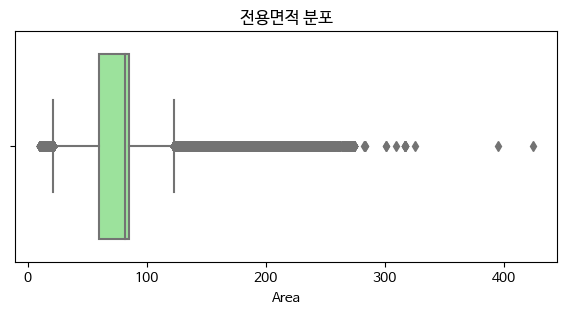

In [ ]:
# 이상치 처리 
# 대표적인 연속형 변수인 “전용 면적” 변수 관련한 분포를 먼저 살펴보도록 하겠습니다.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat, x = '전용면적', color='lightgreen')
plt.title('전용면적 분포')
plt.xlabel('Area')
plt.show()

In [ ]:
# 이상치 제거 방법에는 IQR을 이용하겠습니다.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data 내에 있는 이상치만 제거하도록 하겠습니다.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test data와 다시 합쳐주겠습니다.
    return result

In [ ]:
# 위 방법으로 전용 면적에 대한 이상치를 제거해보겠습니다.
concat = remove_outliers_iqr(concat, '전용면적')
print("전용면적 이상치 처리 후 concat_data :",concat.shape) # 89248개 삭제 됨.

전용면적 이상치 처리 후 concat_data : (1038809, 59)


In [ ]:
concat['is_test'].value_counts()  # 또한, train data만 제거되었습니다.

0    1029537
1       9272
Name: is_test, dtype: int64

## model training

In [ ]:
# 이제 다시 train과 test dataset을 분할해줍니다. 위에서 제작해 놓았던 is_test 칼럼을 이용합니다.
dt_train = concat.query('is_test==0')
dt_test = concat.query('is_test==1')

# 이제 is_test 칼럼은 drop해줍니다.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)



(1029537, 58) (9272, 58)


In [ ]:
dt_train.columns

Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500',
       'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area',
       '대장아파트_거리', '주차대수', 'k-전체세대수', '세대수당_주차대수', '년도별_세대수당_평균_주차대수', '건물나이',
       '최고층', '최저층', '빌딩간격', 'type_ratio_0_30', 'type_ratio_30_60',
       'type_ratio_60_90', 'type_ratio_90_120', 'type_ratio_120_inf', '거래날차이',
       '2016_ratio', '2017_ratio', '2018_ratio', '2019_ratio', '2020_ratio',
       '2021_ratio'],
      dtype='object')

In [ ]:
dt_train = dt_train.assign(year=dt_train['계약년월'].astype('str').str[:4].astype(int)).query('year > 2019')
dt_train, dt_test = map(lambda df: df.assign(**{'전용면적': df['전용면적'] // 3.3}), [dt_train, dt_test])
# 20~23년 데이터로만 학습하니 16~19 ratio 컬럼 삭제 
columns_to_exclude1 = ['2016_ratio', '2017_ratio', '2018_ratio','2019_ratio','year']
columns_to_exclude2 = ['2016_ratio', '2017_ratio', '2018_ratio','2019_ratio']

# columns_to_exclude1 = ['year']
# columns_to_exclude2 = ['2016_ratio', '2017_ratio', '2018_ratio']

dt_train = dt_train.drop(columns=columns_to_exclude1)
dt_test = dt_test.drop(columns=columns_to_exclude2)

# dt_train['price'] = dt_train.groupby(['x', 'y'])['target'].transform('mean')
# # 'x', 'y' 좌표를 기준으로 중복된 행을 제거
# dt_train = dt_train.drop_duplicates(subset=['x', 'y'])



In [ ]:
display(dt_train)
display(dt_test)

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,최저층,빌딩간격,type_ratio_0_30,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf,거래날차이,2020_ratio,2021_ratio
26,계단식,개별난방,24.0,4,3,1987,127.057210,37.476763,개포6차우성,202112,...,1,4,0.000000,0.466981,0.745283,0.165094,0.084906,4474.0,74.687709,81.053206
27,계단식,개별난방,24.0,12,4,1987,127.057210,37.476763,개포6차우성,202204,...,1,4,0.000000,0.466981,0.745283,0.165094,0.084906,129.0,74.687709,81.053206
28,계단식,개별난방,24.0,21,2,1987,127.057210,37.476763,개포6차우성,202204,...,1,4,0.000000,0.466981,0.745283,0.165094,0.084906,9.0,74.687709,81.053206
29,계단식,개별난방,24.0,27,2,1987,127.057210,37.476763,개포6차우성,202205,...,1,4,0.000000,0.466981,0.745283,0.165094,0.084906,36.0,74.687709,81.053206
30,계단식,개별난방,16.0,4,1,1987,127.057210,37.476763,개포6차우성,202012,...,1,4,0.000000,0.466981,0.745283,0.165094,0.084906,-539.0,74.687709,81.053206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127407,혼합식,개별난방,17.0,8,8,2020,127.107564,37.600301,다우하임,202007,...,2,11,0.000000,0.649215,0.617801,0.230366,0.167539,0.0,31.197193,32.823432
1127418,계단식,개별난방,36.0,7,5,2004,127.080730,37.586150,승일카이저,202007,...,2,5,0.000000,0.297814,0.366120,0.139344,0.062842,0.0,31.197193,32.823432
1127434,혼합식,개별난방,20.0,22,6,2003,127.082629,37.583741,영우,202001,...,2,4,0.000000,0.297814,0.366120,0.139344,0.062842,0.0,31.197193,32.823432
1127469,혼합식,개별난방,17.0,20,5,2003,127.073650,37.592536,매원,202002,...,2,3,0.009042,0.245253,0.250904,0.058318,0.022378,96.0,31.197193,32.823432


,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,최저층,빌딩간격,type_ratio_0_30,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf,거래날차이,2020_ratio,2021_ratio
69083,계단식,개별난방,24.0,26,5,1987,127.057210,37.476763,개포6차우성,202307,...,1,4,0.003704,0.133333,0.188889,0.066667,0.000000,5983.0,74.687709,81.053206
69084,혼합식,지역난방,48.0,28,15,1984,127.055990,37.483894,개포우성3차,202307,...,1,14,0.021552,0.469828,0.461207,0.038793,0.081897,5852.0,74.687709,81.053206
69085,혼합식,지역난방,40.0,10,14,1984,127.055990,37.483894,개포우성3차,202308,...,1,14,0.000000,0.130864,0.167901,0.101235,0.004938,13.0,74.687709,81.053206
69086,혼합식,지역난방,31.0,18,6,1984,127.055990,37.483894,개포우성3차,202308,...,1,14,0.000000,0.130864,0.167901,0.101235,0.004938,8.0,74.687709,81.053206
69087,복도식,지역난방,22.0,28,8,1983,127.068028,37.487802,개포주공5단지,202307,...,1,13,0.000000,0.130864,0.167901,0.101235,0.004938,5817.0,74.687709,81.053206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128052,복도식,개별난방,15.0,22,7,1996,127.093511,37.616533,신내6대주,202307,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,7.0,31.197193,32.823432
1128053,복도식,개별난방,12.0,7,3,1996,127.093511,37.616533,신내6대주,202308,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,16.0,31.197193,32.823432
1128054,혼합식,개별난방,18.0,17,4,1996,127.093511,37.616533,신내6대주,202308,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,10.0,31.197193,32.823432
1128055,복도식,개별난방,12.0,2,9,1996,127.093511,37.616533,신내6대주,202309,...,3,9,0.000000,0.199715,0.271041,0.031384,0.001427,16.0,31.197193,32.823432


In [ ]:
print(dt_train.columns)
print(dt_test.columns)

Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수',
       '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500',
       'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area',
       '대장아파트_거리', '주차대수', 'k-전체세대수', '세대수당_주차대수', '년도별_세대수당_평균_주차대수', '건물나이',
       '최고층', '최저층', '빌딩간격', 'type_ratio_0_30', 'type_ratio_30_60',
       'type_ratio_60_90', 'type_ratio_90_120', 'type_ratio_120_inf', '거래날차이',
       '2020_ratio', '2021_ratio'],
      dtype='object')
Index(['복도유형', '난방방식', '전용면적', '계약일', '층', '건축년도', 'x', 'y', '아파트명', '계약년월',
       '도로명', '도로명주소', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적',
       'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', '동', '시군구',
       'bus_min_dist', 'sub_min_dist', '한강거리'

In [ ]:
# dt_test의 target은 일단 0으로 임의로 채워주도록 하겠습니다.
dt_test['target'] = 0

In [ ]:
# 파생변수 제작으로 추가된 변수들이 존재하기에, 다시한번 연속형과 범주형 칼럼을 분리해주겠습니다.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("연속형 변수:", continuous_columns_v2)
print("범주형 변수:", categorical_columns_v2)

연속형 변수: ['전용면적', '계약일', '층', '건축년도', 'x', 'y', '계약년월', 'mean_지상층수', 'sum_세대수', 'sum_연면적', 'mean_연면적', 'mean_높이', 'sum_건축면적', 'mean_건축면적', '부속건축물수', 'target', 'bus_min_dist', 'sub_min_dist', '한강거리', '소비자전세물가지수', '소비자월세물가지수', '총인구수', '연GDP', '기준금리', 'dist_to_nearest_school', 'bus_count_500', 'bus_count_1000', 'bus_count_1500', 'bus_count_2000', 'is_station_area', '대장아파트_거리', '주차대수', 'k-전체세대수', '세대수당_주차대수', '년도별_세대수당_평균_주차대수', '건물나이', '최고층', '최저층', '빌딩간격', 'type_ratio_0_30', 'type_ratio_30_60', 'type_ratio_60_90', 'type_ratio_90_120', 'type_ratio_120_inf', '거래날차이', '2020_ratio', '2021_ratio']
범주형 변수: ['복도유형', '난방방식', '아파트명', '도로명', '도로명주소', '동', '시군구']


In [ ]:
# 'your_column_name'은 실제 데이터의 열 이름으로 대체해야 합니다.
problematic_data = dt_test[dt_test['y'] == '2023-07-26']
print(problematic_data)


Empty DataFrame
Columns: [복도유형, 난방방식, 전용면적, 계약일, 층, 건축년도, x, y, 아파트명, 계약년월, 도로명, 도로명주소, mean_지상층수, sum_세대수, sum_연면적, mean_연면적, mean_높이, sum_건축면적, mean_건축면적, 부속건축물수, target, 동, 시군구, bus_min_dist, sub_min_dist, 한강거리, 소비자전세물가지수, 소비자월세물가지수, 총인구수, 연GDP, 기준금리, dist_to_nearest_school, bus_count_500, bus_count_1000, bus_count_1500, bus_count_2000, is_station_area, 대장아파트_거리, 주차대수, k-전체세대수, 세대수당_주차대수, 년도별_세대수당_평균_주차대수, 건물나이, 최고층, 최저층, 빌딩간격, type_ratio_0_30, type_ratio_30_60, type_ratio_60_90, type_ratio_90_120, type_ratio_120_inf, 거래날차이, 2020_ratio, 2021_ratio]
Index: []

[0 rows x 54 columns]


In [ ]:
# 아래에서 범주형 변수들을 대상으로 레이블인코딩을 진행해 주겠습니다.

# 각 변수에 대한 LabelEncoder를 저장할 딕셔너리
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-Encoding을 fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # 나중에 후처리를 위해 레이블인코더를 저장해주겠습니다.

    # Test 데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가해줍니다.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label 데이터인 경우
        lbl.classes_ = np.append(lbl.classes_, label) # 미처리 시 ValueError발생하니 주의하세요!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00,  8.76it/s]


In [ ]:
dt_train.head(1)        # 레이블인코딩이 된 모습입니다.

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,최저층,빌딩간격,type_ratio_0_30,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf,거래날차이,2020_ratio,2021_ratio
26,0,0,24.0,4,3,1987,127.05721,37.476763,258,202112,...,1,4,0.0,0.466981,0.745283,0.165094,0.084906,4474.0,74.687709,81.053206


In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error


# # KFold 객체 생성
# # 예를 들어, 5-Fold 교차 검증을 수행한다고 가정
# kf = KFold(n_splits=10, shuffle=True, random_state=2023)

# # 모델의 성능을 저장할 리스트
# rmse_scores = []

# assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

# # Target과 독립변수들을 분리해줍니다.
# y_train = dt_train['target']
# X_train = dt_train.drop(['target'], axis=1)

# for train_index, val_index in kf.split(X_train):
#     # 학습 데이터와 검증 데이터 분할
#     X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
#     y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

#     # 모델 학습
#     model = lightgbm.LGBMRegressor(n_estimators=100, random_state=1, n_jobs=-1)
#     model.fit(X_train_fold, y_train_fold)

#     # 검증 데이터에 대한 예측
#     pred = model.predict(X_val_fold)

#     # RMSE 계산 및 저장
#     rmse = np.sqrt(mean_squared_error(y_val_fold, pred))
#     rmse_scores.append(rmse)

# # 평균 RMSE 출력
# print(f'Average RMSE: {np.mean(rmse_scores)}')


In [ ]:
#assert dt_train.shape[1] == dt_test.shape[1]          # train/test dataset의 shape이 같은지 확인해주겠습니다.

# Target과 독립변수들을 분리해줍니다.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out split을 사용해 학습 데이터와 검증 데이터를 8:2 비율로 나누겠습니다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

# RandomForestRegressor를 이용해 회귀 모델을 적합시키겠습니다.
# model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model = lightgbm.LGBMRegressor(n_estimators=5, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

# 회귀 관련 metric을 통해 train/valid의 모델 적합 결과를 관찰합니다.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

# RMSE test: 5851.882141463051 -> baseline        # public rmse : 100063.7807
# public rmse 100400
# RMSE test: 5542.436556927391 -> 주차대수, 세대수당_주차대수, 년도별_세대수당_평균_주차대수, k- 전체세대수 : 선형보간으로 결측치 채우고 ['k-전체동수','k-연면적', '건축면적', '아파트명']은 걍 drop   # public rmse : 100353.2661
# RMSE test: 5240.558573703583 -> 건물나이, 빌딩간격, 아파트당 타입비율 계산, 최근 거래와의 차이 날 수 , 연도별 급여총계(2016~2021) 피처 추가  : 총 33개  # public rmse : 99510.19040.

###################################################
# 19.21시 영훈님 공유 데이터 + 내 파생변수 합치기 -> rf :RMSE test: 9166.412843458673 # public rmse : 97714.2110	 ==> randomforest
#  " "                        20~          -> rf :RMSE test: 36673.15796400518 # public rmse : 88377.9979	==> lgbm 	
# 36014.20394786747: 2019~ 했을시  # 
# RMSE test: 30915.79959150939: 15~ 햇을시 # public rsme : 92295.3657

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8371
[LightGBM] [Info] Number of data points in the train set: 112488, number of used features: 53
[LightGBM] [Info] Start training from score 88297.933068
RMSE test: 36673.15796400518


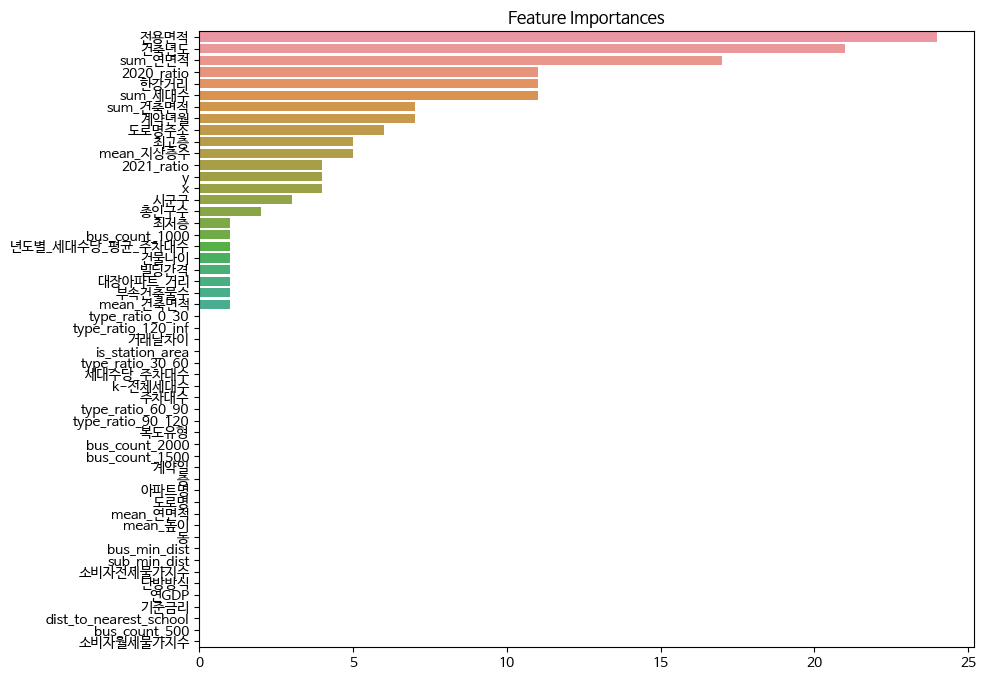

In [ ]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [ ]:
# 학습된 모델을 저장합니다. Pickle 라이브러리를 이용하겠습니다.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Validation dataset에 target과 pred 값을 채워주도록 하겠습니다.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting
X_val_sort.head()

,복도유형,난방방식,전용면적,계약일,층,건축년도,x,y,아파트명,계약년월,...,type_ratio_30_60,type_ratio_60_90,type_ratio_90_120,type_ratio_120_inf,거래날차이,2020_ratio,2021_ratio,target,pred,error
734817,3,2,34.0,15,13,2016,126.993251,37.504900,3157,202109,...,0.189853,0.340426,0.183306,0.060556,3.0,74.406403,80.510746,500000.0,177445.102206,1.040417e+11
12494,1,2,12.0,27,4,1982,127.068935,37.485866,266,202301,...,0.244898,0.177340,0.045742,0.007741,-154.0,74.687709,81.053206,370000.0,74054.676012,8.758363e+10
734693,3,2,34.0,29,7,2016,126.993251,37.504900,3157,202303,...,0.000000,0.000000,0.004907,0.000000,14.0,74.406403,80.510746,470000.0,177445.102206,8.558837e+10
740045,0,2,32.0,12,3,1973,127.002570,37.505351,1853,202301,...,0.000000,0.000000,0.000299,0.000000,9.0,74.406403,80.510746,490000.0,212989.028884,7.673508e+10
734703,3,2,25.0,15,11,2016,126.993251,37.504900,3157,202111,...,0.000000,0.004919,0.000000,0.000000,9.0,74.406403,80.510746,450000.0,177445.102206,7.428617e+10


## inference

In [ ]:
# 저장된 모델을 불러옵니다.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test dataset에 대한 inference를 진행합니다.
real_test_pred = model.predict(X_test)

CPU times: user 5.15 ms, sys: 238 µs, total: 5.39 ms
Wall time: 5.31 ms


In [ ]:
real_test_pred          # 예측값들이 출력됨을 확인할 수 있습니다.

array([124432.34800964, 135222.8775132 , 135222.8775132 , ...,
        79990.20459773,  67472.76186907,  67472.76186907])

In [ ]:
# 앞서 예측한 예측값들을 저장합니다.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)